<a href="https://colab.research.google.com/github/ag22042008/data-Science-notebooks/blob/main/DATAPREPROCESSINGSTEPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance=pd.read_csv('insurance.csv')

In [3]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#EDA

In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [9]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
numeric_columns=['age',  'bmi', 'charges','children']#children is a categorical variable

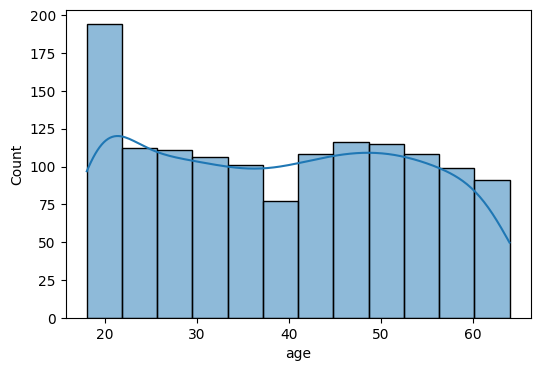

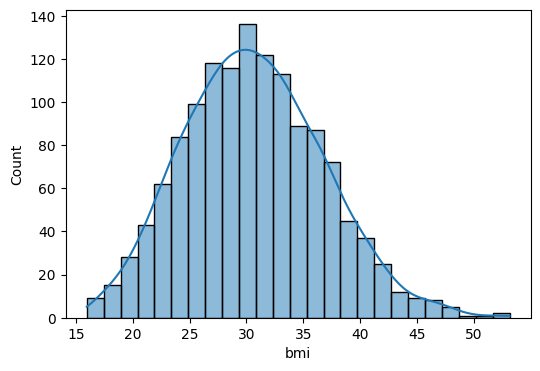

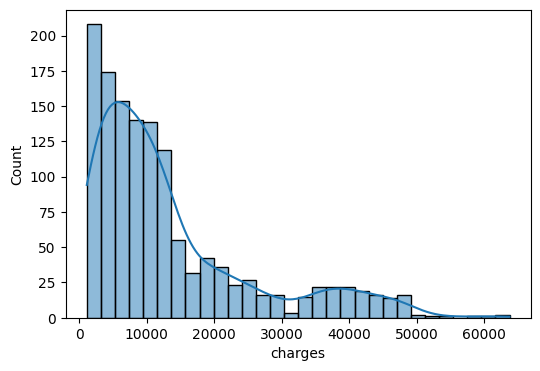

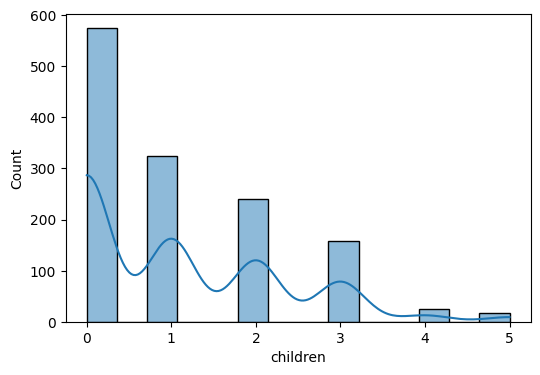

In [11]:
for i in numeric_columns:
  plt.figure(figsize=(6,4))
  sns.histplot(insurance[i],kde=True)
  plt.show()
  # bmi shows best distribution without any mistakes
#age can be some more for  less than 20
#more people of less age so more less charges for age less than 20

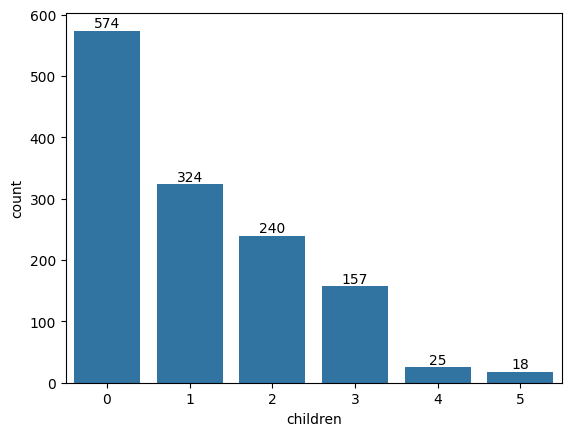

In [12]:
fig=sns.countplot(x=insurance['children'])
for i in fig.patches:
  fig.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

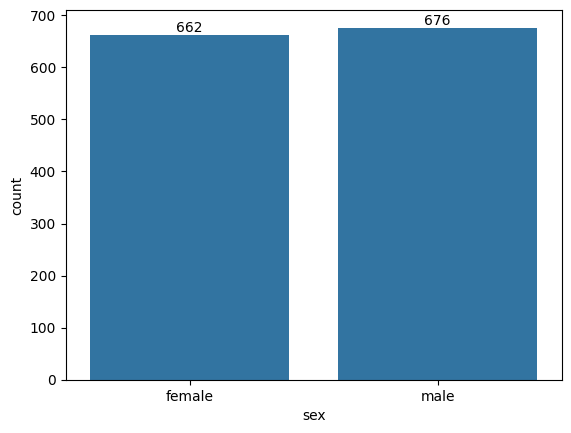

In [13]:
#gender distribution
fig=sns.countplot(x=insurance['sex'])
for i in fig.patches:
  fig.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

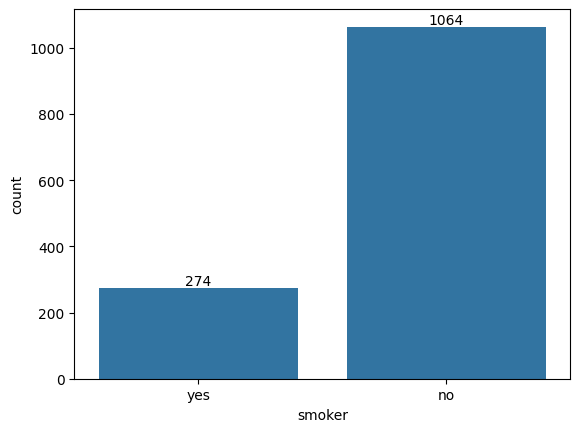

In [14]:
#smokers
fig=sns.countplot(x='smoker',data=insurance)
for i in fig.patches:
  fig.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()), ha='center', va='bottom')
plt.show()

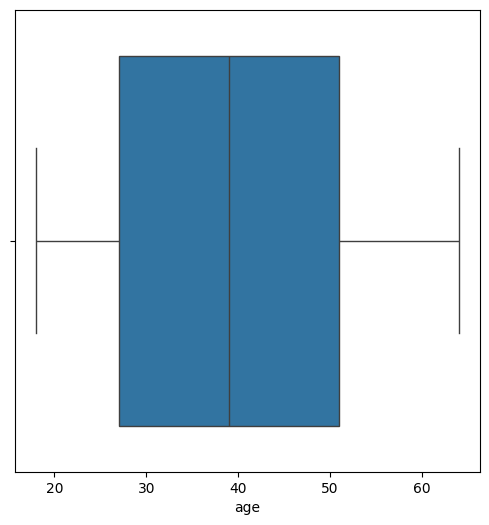

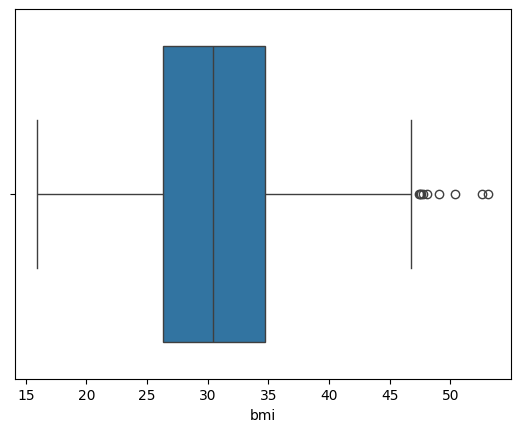

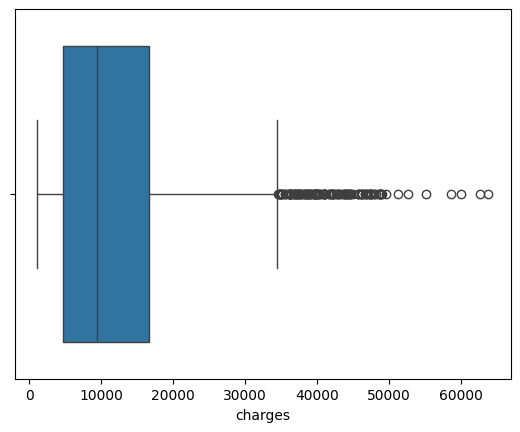

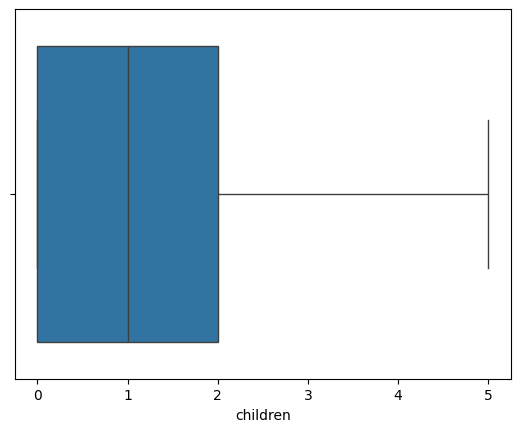

In [15]:
#creating boxplots for further understanding the data and its outliers
plt.figure(figsize=(6,6))
for i in numeric_columns:
  sns.boxplot(x=insurance[i])
  plt.show()
  #ages normal distribution
  #bmi outliers
  #0 children more so boxplot shift leftwards

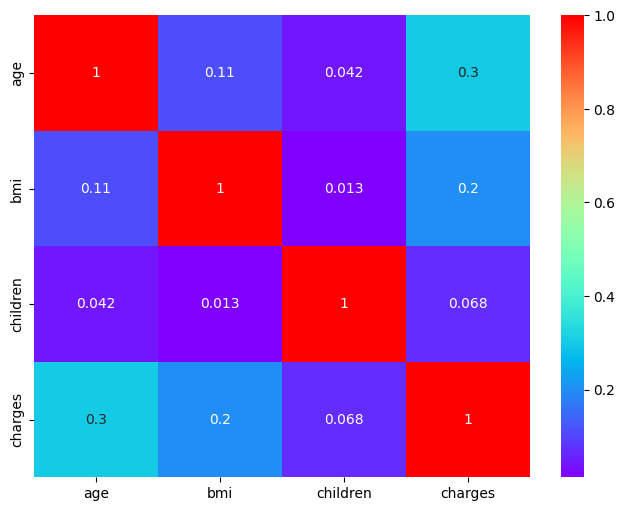

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(insurance.corr(numeric_only=True),annot=True,cmap='rainbow')
plt.show()
#children has very less relation with others

#Data cleaning and preprocessing

In [17]:
insurance_cleaned=insurance.copy()

In [18]:
insurance_cleaned.duplicated().sum()

np.int64(1)

In [19]:
insurance_cleaned.shape

(1338, 7)

In [20]:
insurance_cleaned.drop_duplicates(inplace=True)

In [21]:
insurance_cleaned.shape

(1337, 7)

In [22]:
insurance_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [23]:
insurance_cleaned['sex'].value_counts()# to check if the data has the values like male MALE M

,count
sex,
male,675
female,662


In [24]:
#WE HAVE TO CONVERT INTO NUMERIC TYPES ALL OBJECT VALUES SO WE ENCODE THE VALUES

In [25]:
#LABELED ENCODING
insurance_cleaned['sex']=insurance_cleaned['sex'].map({"male":0,"female":1})

In [26]:
insurance_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


## to check if the data has the values like yes YES Y N WE PERFORM THIS STEP

In [27]:
insurance_cleaned['smoker']=insurance_cleaned['smoker'].map({"yes":1,"no":0})

In [28]:
insurance_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [29]:
insurance_cleaned.rename(columns={
    'sex':'is_female'
    ,'smoker':'is_smoker'

},inplace=True)

In [30]:
insurance_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [31]:
insurance_cleaned

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,northwest,10600.54830
1334,18,1,31.920,0,0,northeast,2205.98080
1335,18,1,36.850,0,0,southeast,1629.83350
1336,21,1,25.800,0,0,southwest,2007.94500


In [32]:
#one hot encoding
insurance_cleaned=pd.get_dummies(insurance_cleaned,columns=['region'])#as it will consider previous column region so we drop it

In [33]:
insurance_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   is_female         1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   is_smoker         1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   bool   
 7   region_northwest  1337 non-null   bool   
 8   region_southeast  1337 non-null   bool   
 9   region_southwest  1337 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 78.3 KB


In [34]:
insurance['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [35]:
insurance_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [36]:
#feature engineering and extraction
insurance_cleaned['bmi_category']=pd.cut(
    insurance_cleaned['bmi'],
    bins=[0,18.5,24.9,29.9,float('inf')]
    ,labels=['underweight','healthy','overweight','obese']
)

In [37]:
insurance_cleaned=pd.get_dummies(insurance_cleaned,columns=['bmi_category'])

In [38]:
insurance_cleaned=insurance_cleaned.astype(int)

In [39]:
insurance_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_healthy,bmi_category_overweight,bmi_category_obese
0,19,1,27,0,1,16884,0,0,0,1,0,0,1,0
1,18,0,33,1,0,1725,0,0,1,0,0,0,0,1
2,28,0,33,3,0,4449,0,0,1,0,0,0,0,1
3,33,0,22,0,0,21984,0,1,0,0,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0,0,0,1,0


#🚨 Models that NEED Feature Scaling (VERY IMPORTANT)

👉 These models use distance, magnitude, or gradients
👉 Bigger numbers = bigger influence ❌

✅ Distance-based models

K-Nearest Neighbors (KNN)

K-Means Clustering

DBSCAN

Hierarchical Clustering

📌 Reason: They calculate distance (Euclidean, etc.)

✅ Gradient-based models

Linear Regression (Gradient Descent)

Logistic Regression

Neural Networks / Deep Learning

📌 Reason: Gradient descent converges faster & correctly when features are scaled

✅ Margin-based models

Support Vector Machine (SVM)

📌 Reason: Margin & hyperplane depend on feature scale

✅ Dimensionality reduction

PCA

LDA

📌 Reason: Variance depends on scale

🟢 Models that DO NOT NEED Feature Scaling

👉 These models split data, not measure distance

❌ Tree-based models

Decision Tree

Random Forest

Extra Trees

XGBoost

LightGBM

CatBoost

📌 Reason:
They ask questions like:

Is salary > 5 lakh?

They don’t care if salary is in ₹ or thousands.

In [42]:
#feature scaling dont do it with the column which we want to predict like charges here
insurance_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_underweight', 'bmi_category_healthy',
       'bmi_category_overweight', 'bmi_category_obese'],
      dtype='object')

In [43]:
from sklearn.preprocessing import StandardScaler #(-3 3 ke scale me impy kr denge)
cols=['age','bmi','children']
scaler=StandardScaler()
insurance_cleaned[cols]=scaler.fit_transform(insurance_cleaned[cols])

In [45]:
insurance_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_underweight,bmi_category_healthy,bmi_category_overweight,bmi_category_obese
0,-1.440418,1,-0.517949,-0.909234,1,16884,0,0,0,1,0,0,1,0
1,-1.511647,0,0.462463,-0.079442,0,1725,0,0,1,0,0,0,0,1
2,-0.799350,0,0.462463,1.580143,0,4449,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.334960,-0.909234,0,21984,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.354547,-0.909234,0,3866,0,1,0,0,0,0,1,0
